# Chronométrer une fonction : notion de complexité

Lorsqu'on écrit un algorithme puis qu'on le programme, on se pose plusieurs questions :
    * la terminaison, est-ce que le programme a s'arrêter ?
    * la correction, le programme donnera-t-il le résultat attendu ?
    * la complexité en temps et en espace : de combien de temps, de combien de mémoire le programme a-t-il besoin pour terminer ?

L'objectif de ce notebook est d'observer le temps d'exécution des algorithmes au programme de la classe de première, et surtout de voir comment elle évolue en fonction de la taille de l'entrée.

In [69]:
# la fonction randint(a,b) renvoie un nombre entier au hasard entre a inclus et b inclus
from random import randint

# on construit une liste de dix nombres, choisis entre 1 et 1000000
liste=[randint(1,1000000) for k in range(10)]

In [70]:
def recherchesequentielle(x,l):
    for elt in l:
        if elt==x:
            return True
    return False

In [71]:
%%timeit
# on cherche chacun des éléments de la liste, afin de faire une moyenne sur la position
# de l'élément cherché, qui sera trouvé plus rapidement en début de liste qu'en fin de liste
for k in liste:
    recherchesequentielle(k,liste)

The slowest run took 9.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.62 µs per loop


L'instruction jupyter magique `%%timeit` va exécuter plusieurs fois le contenu de la cellule et calculer le temps moyen d'exécution.

In [72]:
%%timeit
recherchesequentielle(0,liste)

The slowest run took 6.89 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 481 ns per loop


Attention, dans ce exemple on travaille avec une liste de $n=10$ éléments, le premier temps correspond donc à 10 recherches, alors que le deuxième temps ne correspons qu'à une seule recherche, il faut en tenir compte lorsqu'on  complète le tableau ci-dessous.

Rappelons aussi que $1\mu s=10^{-6}s = 1000 ns$, $1ns=10^{-9}s$. Les temps sont donnés en $ns$.

| n | 10 |20|50|100|200|500|1000|
|---|---|---|---|---|---|---|---|
|Trouvé|362|491|1018|1870|3675|9180|17400|
|Pas trouvé|481|810|1760|3400|6680|17700|33900|

Nous allons utiliser la librairie `matplotlib.pyplot` pour visualiser la façon dont le temps de calcul augmente avec la taille de la liste dans laquelle on recherche un élément.

In [73]:
import matplotlib.pyplot as plt

In [74]:
n=[10,20,50,100,200,500,1000]
et=[362,491,1018,1870,3675,9180,17400]
pt=[481,810,1760,3400,6680,17700,33900]

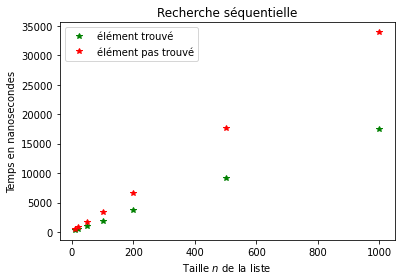

In [75]:
plt.plot(n,et,'g*',label='élément trouvé')
plt.plot(n,pt,'r*',label='élément pas trouvé')
plt.title('Recherche séquentielle')
plt.xlabel('Taille $n$ de la liste')
plt.ylabel('Temps en nanosecondes')
plt.legend()
plt.show()

**Question** Comment qualifier la complexité en temps de cet algorithme ?

*Indice* piocher dans le vocabulaire suivant : linéaire, quadratique, logarithmique, exponentiel, quasi-linéaire.

**Question** Comment caractériser le lien entre les temps pour les deux cas examinés, élément dans la liste vs élément pas dans la liste ?

**Ex1** Refaire les manipulations, remplir le tableau, refaire le graphique.

## Utilisation de la bibliothèque `time`

Un problème avec l'utilisation de `%%timeit`, instruction liée à Jupyter, est que les manipulations pour modifier la taille $n$ de l'entrés sont fastidieuses alors qu'on voudrait les automatiser.

La fonction `time` de la librairie du même nom va nous servir à chronométrer des instructions.

In [80]:
import time

In [81]:
time.time()

1589147946.5354512

In [82]:
time.time()

1589147953.3629844

In [83]:
t0=time.time()

In [87]:
time.time()-t0 # à exécuter plusieurs fois

5.630523681640625

In [89]:
liste=[randint(1,10000000) for k in range(10000)]
t0=time.time()
liste.sort()
t1=time.time()
print(f"La liste de taille {len(liste)} a été triée en {t1-t0} secondes.")

La liste de taille 10000 a été triée en 0.0021970272064208984 secondes.


## A vous de jouer

On attend le même type de travail pour chacun des algortihmes proposés ci-dessous ; on a précisé la façon dont on définissait la taille $n$ d'une instance du problème.

## Recherche dichotomique
La taille $n$ de l'instance est la taille du tableau trié dans lequel on recherche un élément ;
comme pour la recherche séquentielle, on traitera les deux cas, élément présent dans la liste, et élément absent.

## Tri par insertion
La taille $n$ de l'instance est la taille de la liste à trier

# Somme des éléments d'une liste
La taille $n$ est le nombre d'éléments de la liste ; on construira des listes d'entiers pris au hasard entre 1 et 1000, si on autorisait des nombres plus grands cela aurait une influence sur la durée d'exécution. 

## Tri par sélection
La taille $n$ de l'instance est la taille de la liste à trier

In [ ]:
## Un algorithme glouton


## Plus longue sous-suite croissante
La taille $n$ de l'instance est la longueur de la suite dans laquelle on cherche la plus longue sous-suite croissante.

In [ ]:
def plssc(l):
    if len(l)<2:
        return(l)
    else:
        avec=[l[0]]+plssc([k for k in l[1:] if k>=l[0]])
        sans=plssc(l[1:])
    if len(avec)>=len(sans):
        return avec
    else:
        return sans

In [ ]:
plscc([12,8,10,17,11,13,15])